## Research Data

In [407]:
Cancer <- read.csv('cancer.csv', header = T, as.is = T, row.names = 1)

## Import Required R Packages

In [420]:
import <- function(package)
{
    print(paste( 'Importing Package :', package))
    if (!require(package, character.only = T))
        install.packages(package, dep = T)
    library(package, character.only = T)
}

import('ggplot2')
import('repr')
import('corrplot')

#options(repr.plot.width = 8, repr.plot.height = 5)
options(repr.digits = 6)

[1] "Importing Package : ggplot2"
[1] "Importing Package : repr"
[1] "Importing Package : corrplot"


## Utility Functions

In [409]:
# Combo Box & Histogram Plots with Normal Curve and Mean/Median Lines

boxHist <- function(v,name = 'Variable')
{
  vLen    <- length(v)
  vMin    <- min(v, na.rm = T)
  vMax    <- max(v, na.rm = T)
  vBreaks <- seq(vMin, vMax, length.out = 10)
  vMean   <- mean(v, na.rm = T)
  vMedian <- median(v, na.rm = T)
  vSD     <- sd(v)

  l <- layout(mat = matrix(c(1, 2), 2, 1, byrow = T), heights = c(2, 8))
  
  p <- par(mar = c(0, 3, 3, 1), bg = "blanchedalmond")
  b <- boxplot(v,
               main = name,
               horizontal = T,
               xaxt = 'n',
               col ='#5E4FA2',
               frame = F)

  p <- par(mar = c(5, 3, 0, 1))
  d <- hist(v,
           breaks = vBreaks,
           plot = F)
  h <- hist(v,
            breaks = vBreaks,
            col = c('#9E0142','#D53E4F','#F46D43','#FDAE61','#FEE08B','#FFFFBF','#E6F598','#ABDDA4','#66C2A5'),
            border = NA,
            main = NA,
            xlab = sprintf('Mean is %6.3f, Median is %6.3f', vMean, vMedian),
            ylab = NA,
            ylim = c(0, max(d$counts) * 1.1),
            labels = T,
            font.lab = 2)
  
  xFit <- seq(vMin, vMax, length.out = 100)
  yFit <- dnorm(xFit, mean = vMean, sd = vSD)
  yFit <- yFit * diff(h$mids[1:2]) * vLen
  
  x <- lines(xFit, yFit, col = '#5E4FA2C0', lwd = 3)
  x <- abline(v = vMean, col = '#3288BDC0', lwd = 3, lty = 1)
  x <- abline(v = vMedian, col = '#3288BDC0', lwd = 3, lty = 2)
}

dropOut <- function(v)
{
  return (v[!v %in% boxplot.stats(v)$out]) # drop values that are outside +/- 1.5 IQR
}

## Data Transformation

In [476]:
Cancer$incedenceCount <- Cancer$avgAnnCount
Cancer$incedenceCount[Cancer$incedenceCount==1962.667684] <- NA # remove erroneous values

### Replace erroneous values with imputation

In [477]:
incedenceMean.old <- mean(Cancer$incedenceCount/Cancer$popEst2015, na.rm = T)
Cancer$incedenceCount[is.na(Cancer$incedenceCount)] <- incedenceMean.old * Cancer$popEst2015[is.na(Cancer$incedenceCount)]
incedenceMean.new <- mean(Cancer$incedenceCount/Cancer$popEst2015)

### Calculate incedenceRate per 100K Population, comparable to deathRate per 100K Population

,avgAnnCount,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,...,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate,incidenceRate,deathsPerIncidence,incedenceCount,incedenceRate,deathsPerIncedencePercent
2682,24,45933,11368,18.8,"(45201, 48021.6]",23.3,23.0,24.5,"Chattahoochee County, Georgia",3.24,...,3.14756,2.853785,67.2566,11.72014,220.6,211.119,1.04491,24,211.119,104.491
2714,8,68387,5702,9.9,"(61494.5, 125635]",36.8,38.8,32.9,"Aleutians West Census Area, Alaska",3.59,...,37.15693,5.295567,42.8822,4.39105,203.3,140.302,1.44902,8,140.302,144.902
2716,37,45808,17946,23.8,"(45201, 48021.6]",26.7,27.0,26.5,"Bethel Census Area, Alaska",3.86,...,1.17574,0.343159,45.5214,9.15628,218.8,206.174,1.06124,37,206.174,106.124


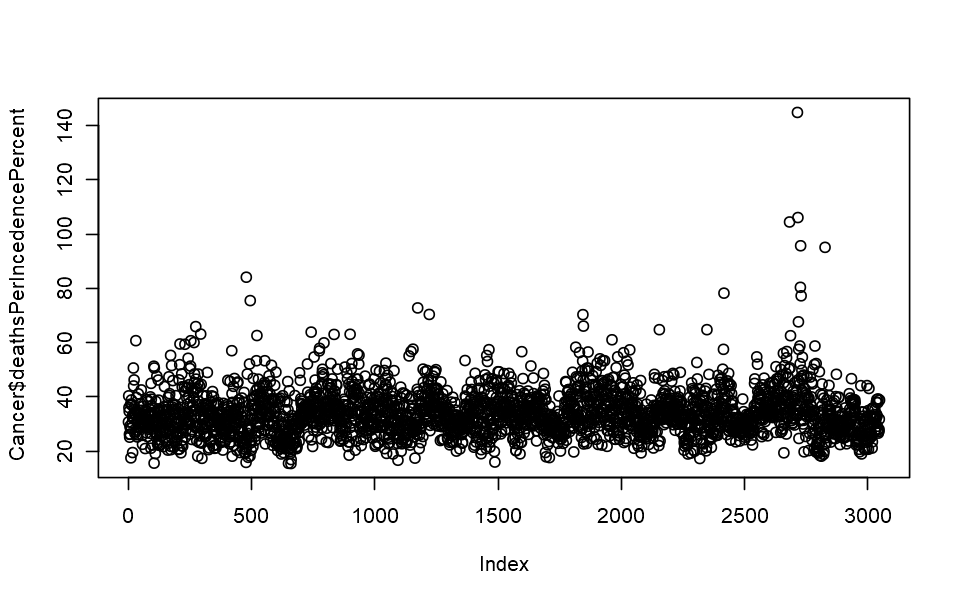

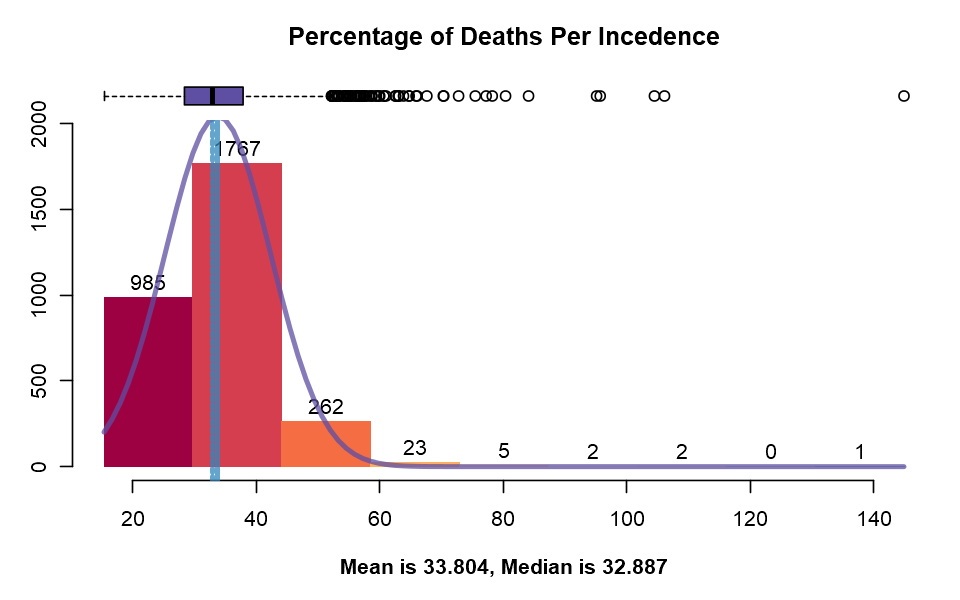

In [480]:

Cancer$incedenceRate <- Cancer$incedenceCount / Cancer$popEst2015 * 100000

Cancer$deathsPerIncedencePercent <- Cancer$deathRate / Cancer$incedenceRate * 100

plot(Cancer$deathsPerIncedencePercent)

Cancer[Cancer$deathsPerIncedencePercent>100,] # more deaths than incidences

boxHist(Cancer$deathsPerIncedencePercent, 'Percentage of Deaths Per Incedence')

## Data Grouping

### Location
- Geography

### Age [Pri]
- MedianAge
- MedianAgeMale
- MedianAgeFemale

### Family [Pri]
- AvgHouseholdSize
- PctMarriedHouseholds
- PercentMarried
 
### Ethnicity [Pri]
- PctWhite
- PctBlack
- PctAsian
- PctOtherRace

### Education [Ramiro]
- PctNoHS18_24
- PctHS18_24
- PctSomeCol18_24
- PctBachDeg18_24
- PctHS25_Over
- PctBachDeg25_Over

### Employment [Pri]
- PctEmployed16_Over
- PctUnemployed16_Over

### Income [Payman]
- medIncome
- povertyPercent
- binnedInc

### Insurance [Payman]
- PctPrivateCoverage
- PctEmpPrivCoverage
- PctPublicCoverage

### Population
- popEst2015
- avgAnnCount
- BirthRate
- **incidenceRate**

### Outcome
- deathRate

0.5 % of the population develops cancer each year : median(Cancer$avgAnnCount/Cancer$popEst2015) * 100



# Analysis of Key Relationships

In this section we will explore how our outcome variable **deathEst2015** is releated to the other variables in our dataset. We will focus the analysis on the following aspects:
- Income
- Ethnicity
- Education
- Insurance
- Family
    - House Hold Size
    - Marital Status

### 3.0 Correlation Matrix

,avgAnnCount,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,...,PctPublicCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate,incidenceRate,deathsPerIncidence
avgAnnCount,1.00,0.23,0.95,-0.12,-0.03,-0.12,-0.12,0.08,-0.11,-0.11,...,-0.17,-0.13,0.02,0.40,0.25,-0.09,-0.04,-0.13,0.13,-0.10
medIncome,0.23,1.00,0.18,-0.80,-0.01,-0.09,-0.15,0.08,0.34,-0.32,...,-0.76,0.18,-0.28,0.46,0.08,0.45,-0.06,-0.41,0.02,-0.05
popEst2015,0.95,0.18,1.00,-0.05,-0.02,-0.16,-0.16,0.11,-0.15,-0.09,...,-0.15,-0.17,0.05,0.40,0.29,-0.11,-0.06,-0.11,-0.04,0.12
povertyPercent,-0.12,-0.80,-0.05,1.00,-0.02,-0.22,-0.14,0.08,-0.63,0.31,...,0.64,-0.52,0.53,-0.17,0.08,-0.60,-0.01,0.40,-0.12,0.30
MedianAge,-0.03,-0.01,-0.02,-0.02,1.00,0.09,0.11,-0.04,0.04,0.00,...,0.04,0.02,0.02,-0.05,-0.03,0.00,0.01,-0.01,0.00,-0.05
MedianAgeMale,-0.12,-0.09,-0.16,-0.22,0.09,1.00,0.93,-0.35,0.48,0.14,...,0.39,0.40,-0.24,-0.29,-0.29,0.21,-0.02,-0.02,0.16,-0.51
MedianAgeFemale,-0.12,-0.15,-0.16,-0.14,0.11,0.93,1.00,-0.36,0.39,0.21,...,0.45,0.33,-0.14,-0.31,-0.30,0.12,-0.01,0.04,0.17,-0.51
AvgHouseholdSize,0.08,0.08,0.11,0.08,-0.04,-0.35,-0.36,1.00,-0.10,0.04,...,-0.12,-0.20,0.06,0.11,0.23,0.11,0.02,-0.05,-0.10,0.29
PercentMarried,-0.11,0.34,-0.15,-0.63,0.04,0.48,0.39,-0.10,1.00,0.00,...,-0.22,0.66,-0.59,-0.17,-0.13,0.85,0.15,-0.24,0.11,-0.36
PctNoHS18_24,-0.11,-0.32,-0.09,0.31,0.00,0.14,0.21,0.04,0.00,1.00,...,0.37,-0.17,0.16,-0.24,0.15,-0.03,0.11,0.11,0.00,-0.01


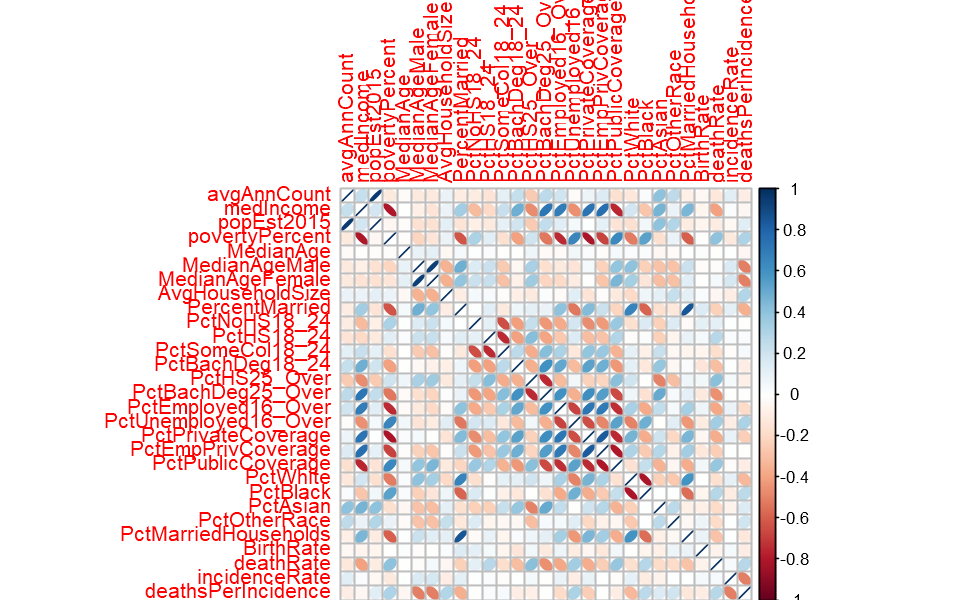

In [436]:
CancerNUM <- Cancer[, !names(Cancer) %in% c('Geography', 'binnedInc')]
CancerCOR <- cor(CancerNUM, use = 'complete.obs')
round(CancerCOR,2)
corrplot( round(CancerCOR,2), method = 'ellipse', font = 1 )

### 3.1 Income

Exploring the median income and poverty variables with respect to deaths due to cancer we see a <TODO> correlation.

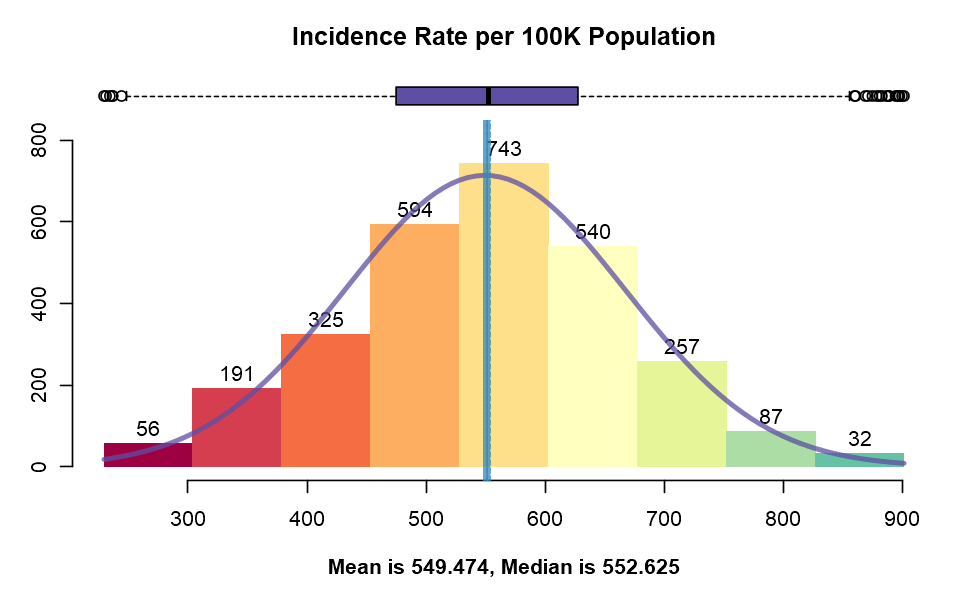

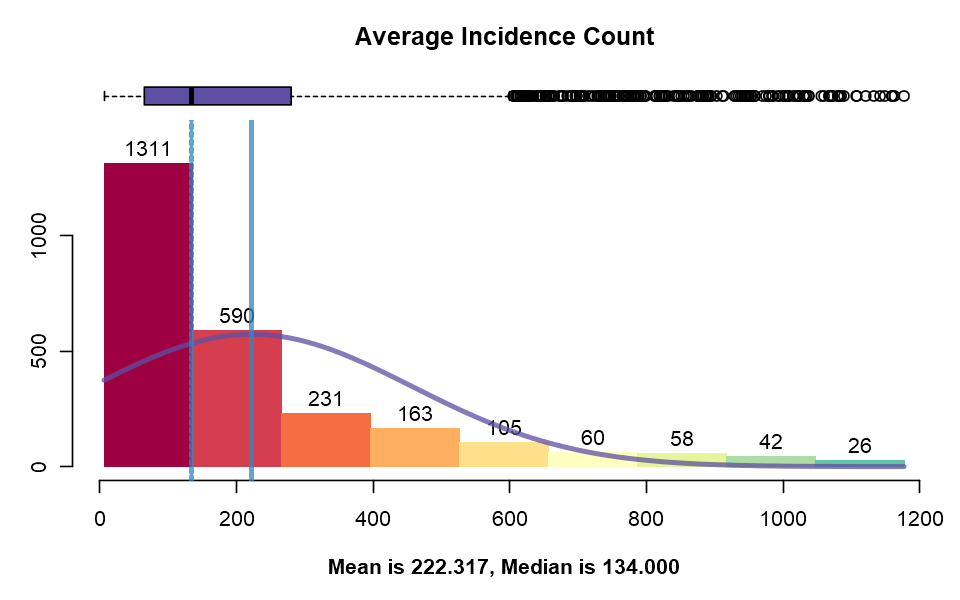

In [412]:
Cancer$incidenceRate <- Cancer$avgAnnCount/Cancer$popEst2015*100000
boxHist(dropOut(Cancer$incidenceRate), 'Incidence Rate per 100K Population')

boxHist(dropOut(Cancer$avgAnnCount), 'Average Incidence Count')


Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
"Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'"

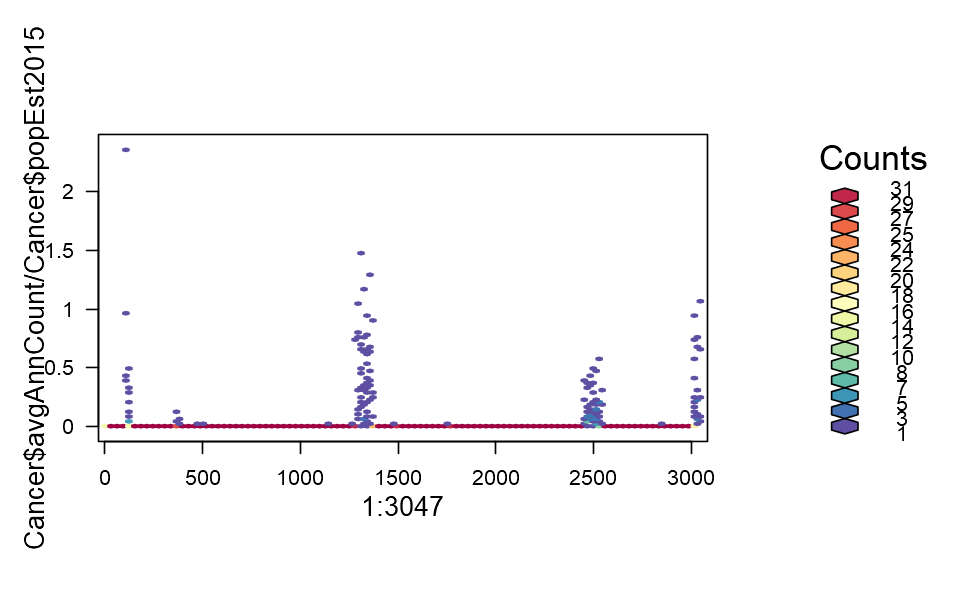

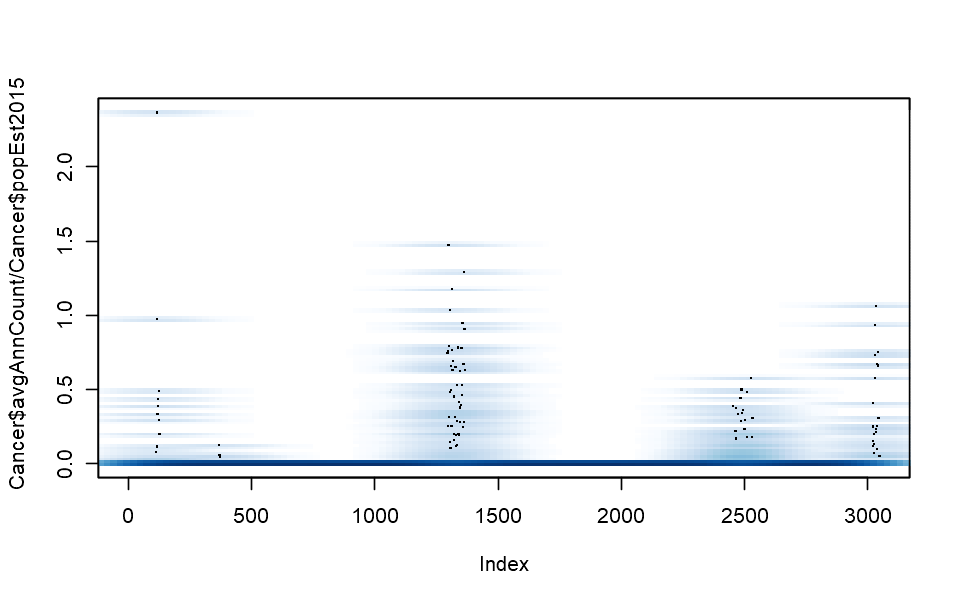

ERROR: Error in plot.xy(xy, type, ...): invalid graphics state


ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title "NA"

In [475]:
library(hexbin)
library(RColorBrewer)

plot(hexbin(1:3047,Cancer$avgAnnCount/Cancer$popEst2015, xbins=100), colramp = colorRampPalette(rev(brewer.pal(11,'Spectral'))))


smoothScatter(Cancer$avgAnnCount/Cancer$popEst2015)

plot(Cancer$avgAnnCount/Cancer$popEst2015)
plot(Cancer$deathRate/Cancer$avgAnnCount)


In [414]:
Cancer$deathsPerIncidence <- Cancer$deathRate / Cancer$incidenceRate
